# ML - Classification

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

sns.set_theme(style="whitegrid")

## Motivation

Space Shuttle Challenger Disaster

<p><img src="https://upload.wikimedia.org/wikipedia/commons/9/9f/Challenger_explosion.jpg" alt="Challenger explosion.jpg" height="720" width="889"></a><br>By Kennedy Space Center</p>

In [4]:
filepath = Path().resolve().parent / "data" / "challenger.txt"
challenger = pd.DataFrame(
    np.loadtxt(filepath, skiprows=1).astype(int),
    columns=["temp_f", "nm_bad_rings"]
)
challenger.head()

,temp_f,nm_bad_rings
0,53,3
1,56,1
2,57,1
3,63,0
4,66,0


/tmp/ipykernel_2342/3810344009.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


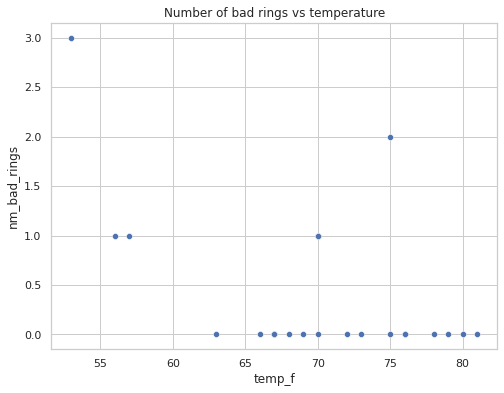

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(
    x="temp_f",
    y="nm_bad_rings",
    data=challenger,
    ax=ax
)
ax.set_title("Number of bad rings vs temperature")
fig.show()


In [6]:
challenger = challenger.assign(
    failure=lambda x: x["nm_bad_rings"].ne(0),
    is_failure=lambda x: x["failure"].astype(int),
)

/tmp/ipykernel_2342/2432193437.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


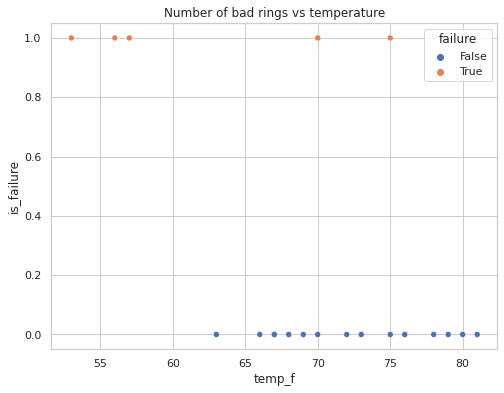

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(
    x="temp_f",
    y="is_failure",
    hue="failure",
    data=challenger,
    ax=ax
)
ax.set_title("Number of bad rings vs temperature")
fig.show()

## Logistic Regression

Similar to Linear Regression we are looking for a model that approximates
$$ Y \approx f_\beta(X) $$

where
$$
X = \begin{bmatrix} 
1 & x^{(1)}_1 & \dots & x^{(1)}_p \\ 
1 & x^{(2)}_1 & \dots & x^{(2)}_p \\
\vdots & \vdots & & \vdots \\
1 & x^{(n)}_1 & \dots & x^{(n)}_p
\end{bmatrix}
\quad , \quad
Y = \begin{bmatrix}y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)}\end{bmatrix}
\quad \text{and} \quad
\beta = \begin{bmatrix}\beta_0 \\ \beta_1 \\ \vdots \\ \beta_n\end{bmatrix}
$$

but we want to train a non-linear function

$$f_{\beta}(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + ... + \beta_p x_n)}}$$

and to minimize the cost function
$$J(\beta) = \frac{1}{2} \sum_{i=1}^{n} \left( y^{(i)} - f_{\beta}(x^{(i)})\right)^2$$

Notice that we can write

$$Y \approx f_\beta(X) = g(X \beta)$$

where $g(z)$ is a _sigmoid function_,

$$g(z) = \frac{1}{1+e^{-z}}$$

### Decision

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

/tmp/ipykernel_2342/2360946209.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


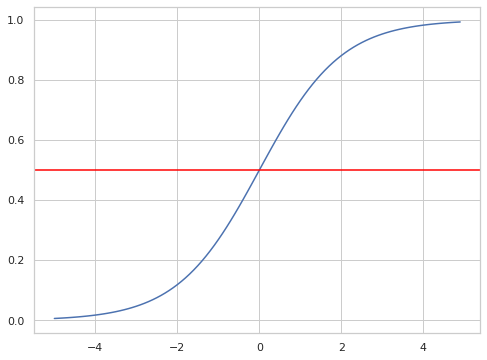

In [13]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y)
ax.axhline(y=0.5, xmin=-5, xmax=5, color="red")
fig.show()

## Optimization

First of all, the derivative of this sigmoid function is easy to compute.

$$\begin{aligned}
g'(z) &= \frac{-1}{(1+e^{-z})^2} (-e^{-z}) \\
      &= \frac{e^{-z}}{(1+e^{-z})^2} \\
      &= \frac{1}{1+e^{-z}} \frac{e^{-z}}{1+e^{-z}} \\
      &= \frac{1}{1+e^{-z}} \left(1 - \frac{1}{1+e^{-z}} \right) \\
      &= g(z)(1-g(z))\end{aligned}$$

In order to compute the jacobian we need the partial derivatives,

$$\begin{aligned}
\frac{\partial J(\beta)}{\partial \beta_k}
&= \sum_{i=1}^{m} \left( y^{(i)} - f_{\beta}(x^{(i)}) \right) \frac{\partial}{\partial \beta_k} f_{\beta}(x^{(i)}) \\
&= \sum_{i=1}^{m}  \left( y^{(i)} - f_{\beta}(x^{(i)}) \right) \frac{\partial}{\partial \beta_k} g(\beta^T x^{(i)}) \\
&= \sum_{i=1}^{m}  \left( y^{(i)} - f_{\beta}(x^{(i)}) \right) f_{\beta}(x^{(i)}) \left(1-f_{\beta}(x^{(i)})\right) \frac{\partial}{\partial \beta_k} (\beta^T x^{(i)}) \\
&= \sum_{i=1}^{m}  \left( y^{(i)} - f_{\beta}(x^{(i)}) \right) f_{\beta}(x^{(i)}) \left(1-f_{\beta}(x^{(i)})\right) x^{(i)}_k\end{aligned}$$

then

$$\nabla_{\beta} J(\beta) = X^\top  \Big[ (Y - g(X\beta)) \odot g(X\beta) \odot (1 - g(X\beta)) \Big]$$

where $\odot$ is a element-wise multiplication, usually called Hadamard product.

Then, the gradient descend algorithm for the binary logistic regression is

$$\begin{aligned}
\beta^{(n+1)} & = \beta^{(n)} - \alpha \nabla_{\beta} J(\beta^{(n)}) \\
\nabla_{\beta} J(\beta) &= X^\top  \Big[ (Y - g(X\beta)) \odot g(X\beta) \odot (1-g(X\beta)) \Big]\end{aligned}$$


## Implementation

In [15]:
from sklearn.linear_model import LogisticRegression

In [18]:
X = challenger[["temp_f"]]
y = challenger["is_failure"]
model = LogisticRegression()
model.fit(X, y)

array([[-0.17014123]])

In [19]:
model.coef_.T

array([[-0.17014123]])

In [20]:
%%timeit
LogisticRegression().fit(X, y)

2.45 ms ± 132 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
model.score(X, y)

0.7916666666666666

In [23]:
# Predicting values
y_pred = model.predict(X)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

## Multi-Label Classification